# Line√°rn√≠ Regrese

√öloha zamƒõ≈ôen√° na implementaci line√°rn√≠ regrese pomoc√≠ metody LSE.

Data reprezentuj√≠ v√Ωsledky zkou≈°ky, konkr√©tnƒõ bodov√Ω zisk v z√°vislosti na dobƒõ studia.

Import knihoven:

In [81]:
import numpy as np
import usu

Naƒçten√≠ dat:

In [82]:
npzfile = np.load('data/data_02.npz')
npzfile.files


['x0', 'x1']

P≈ôi≈ôazen√≠ dat do nez√°visl√© a z√°visl√© promƒõnn√©:

In [83]:
x = npzfile['x0']
y = npzfile['x1']
x.shape, y.shape # 100 radku a 1 sloupec


((100, 1), (100, 1))

Vykreslen√≠ dat:

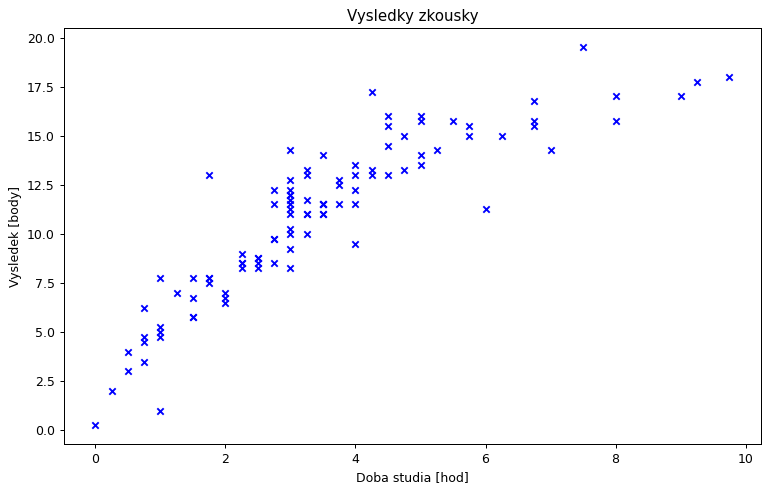

In [84]:
usu.draw(x, y, "Vysledky zkousky", "Doba studia [hod]", "Vysledek [body]")

## LSE (Least-Squares Estimation)


### Odhad parametr≈Ø $\theta$ :

$$ \theta = (\tilde{X^T} \tilde{X})^{-1} \tilde{X^T} y $$  
kde $\tilde{X}$ je roz≈°√≠≈ôen√° matice dat $X$ (je roz≈°√≠≈ôen√° o jeden sloupec s hodnotami 1)

#### P≈ô√≠klad matice $\tilde{X}$ pro line√°rn√≠ regresi:

$$
    X = 
        \begin{bmatrix}
        1 \\
        2 \\
        3\\
        \end{bmatrix} 
    \implies
        \tilde{X} = 
        \begin{bmatrix}
        1 & 1 \\
        1 & 2 \\
        1 & 3\\
        \end{bmatrix} 
$$


#### P≈ô√≠klad matice  $\tilde{X}$ pro polynomi√°ln√≠ regresi:

* Ka≈æd√° vy≈°≈°√≠ mocnina $X$ je v p≈ô√≠padƒõ PR pova≈æov√°na za **dal≈°√≠ nez√°vislou promƒõnnou**.

$$
    X = 
        \begin{bmatrix}
        1 & 1 \\
        2 & 4 \\
        3 & 9 \\
        \end{bmatrix} 
    \implies
    \tilde{X} = 
        \begin{bmatrix}
        1 & 1 & 1 \\
        1 & 2 & 4 \\
        1 & 3 & 9 \\
        \end{bmatrix} 
$$


### Odhad  $\theta$ se zapojen√≠m regularizace:
$$ \theta = (\tilde{X^T} \tilde{X} + \lambda I)^{-1} \tilde{X^T} y $$  
kde $\lambda$ je koeficient regularizace (hyperparametr), $I$ je jednotkov√° matice o rozmƒõrech $n \times n$ ($n$ je poƒçet sloupc≈Ø matice $\tilde{X}$)

Funkce pro odhad parametr≈Ø theta:

In [85]:
def computeThetaLSE(x, y, order=1, lmbd=0):
    """
    x - vektor vstupnich hodnot (doba studia)
    y - vektor vystupnich  hodnot (zisk bodu)
    order - rad polynomu
    lmbd - regularizacni parametr lambda
    
    """
    #################################################################
    # ZDE DOPLNTE KOD
    
    x = np.ravel(x) # flatten
    I = np.eye(order+1)
    X = np.vander(x, order+1, increasing=True) # Vandermondova matice - s jednickami na zacatku
    theta = np.linalg.inv(X.T @ X + lmbd * I) @ X.T @ y
    
    
    #################################################################
    
    return theta


In [86]:
theta = computeThetaLSE(x, y)

Vykreslen√≠ v√Ωsledk≈Ø regrese:

In [87]:
#vstupni paremetry do funkce usu.dra (theta, x a y) musi byt typu np.array nikoli matrix

usu.draw(x, y, "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", theta)

Urƒçete p≈ôedpokl√°dan√Ω zisk bod≈Ø v p≈ô√≠padƒõ p≈ô√≠pravy v d√©lce 4 hodin:

x : 4.000, y : 11.824


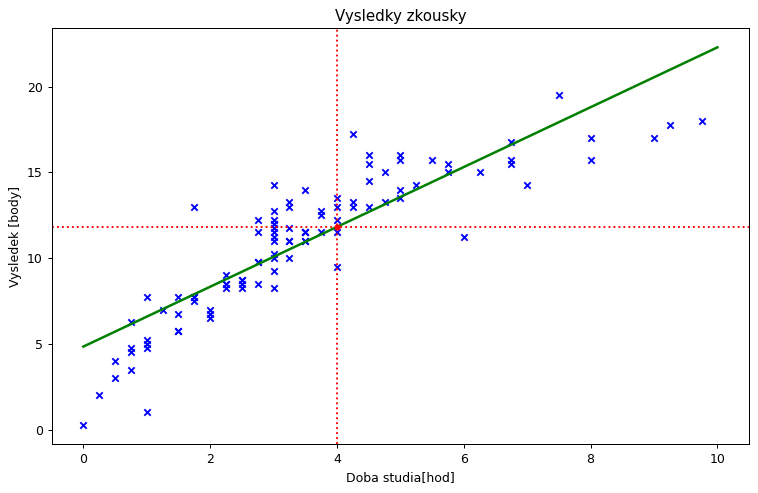

In [88]:
#################################################################
# ZDE DOPLNIT

valueX = 4
valueY = theta[0] + theta[1]*valueX
usu.draw(x, y, "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", theta, valueX, valueY)
#################################################################


Urƒçete p≈ôedpokl√°danou dobu studia v p≈ô√≠padƒõ zisku 12 bod≈Ø:

In [98]:
#################################################################
# ZDE DOPLNIT

valueY = 12
valueX = (valueY - theta[0])/theta[1]

#################################################################

usu.draw(x, y, "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", theta, valueX, valueY)


x : 2.570, y : 12.000


### Polynomi√°ln√≠ regrese

Urƒçete p≈ôedpokl√°dan√Ω zisk bod≈Ø v p≈ô√≠padƒõ p≈ô√≠pravy v d√©lce 4 hodin, ≈ô√°du polynomu 2 a ùúÜ 1:

In [118]:
order = 2
lmbd = 1
theta = computeThetaLSE(x, y, order, lmbd)

#################################################################
# ZDE DOPLNIT

valueX = 4
valueY = theta[0] + theta[1]*valueX + theta[2]*valueX**2
# Nejvhodnejsi rad polynomu a proc: 2, protoze se nejlepe prizpusobi datum

#################################################################

usu.draw(x, y, "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", theta, valueX, valueY)


x : 4.000, y : 12.844


### Exponenci√°ln√≠ regrese

Re≈°√≠ se jako line√°rn√≠ regrese pro data s hodnotami $[x,\log{(y)}]$

In [109]:
npzfile = np.load('data/data_02_exp.npz')
npzfile.files

['x0', 'x1']

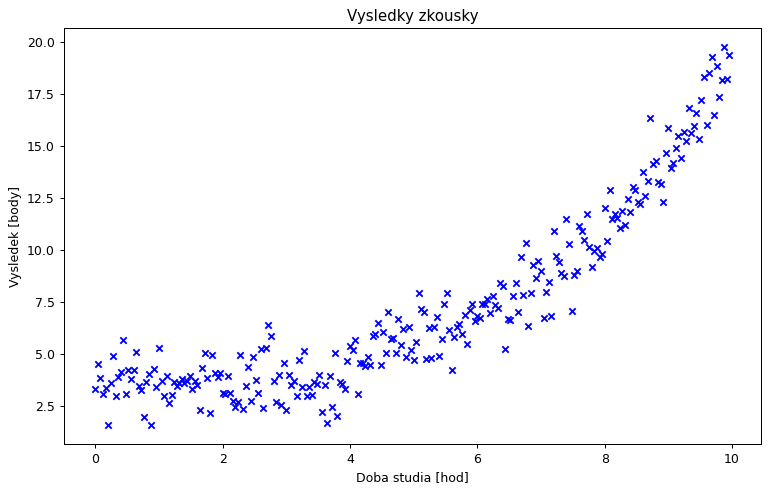

In [117]:
x_exp = npzfile['x0']
y_exp = npzfile['x1']
usu.draw(x_exp, y_exp, "Vysledky zkousky", "Doba studia [hod]", "Vysledek [body]")


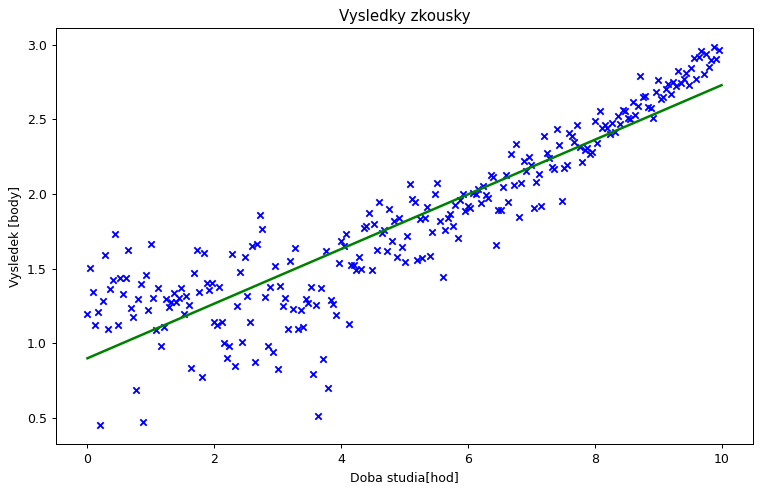

In [116]:
#################################################################
# ZDE DOPLNIT

theta = computeThetaLSE(x_exp, np.log(y_exp), 1)
usu.draw(x_exp, np.log(y_exp), "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", theta)

#################################################################


Urƒçete p≈ôedpokl√°dan√Ω zisk bod≈Ø v p≈ô√≠padƒõ p≈ô√≠pravy v d√©lce 4 hodin:

x : 4.000, y : 1.632


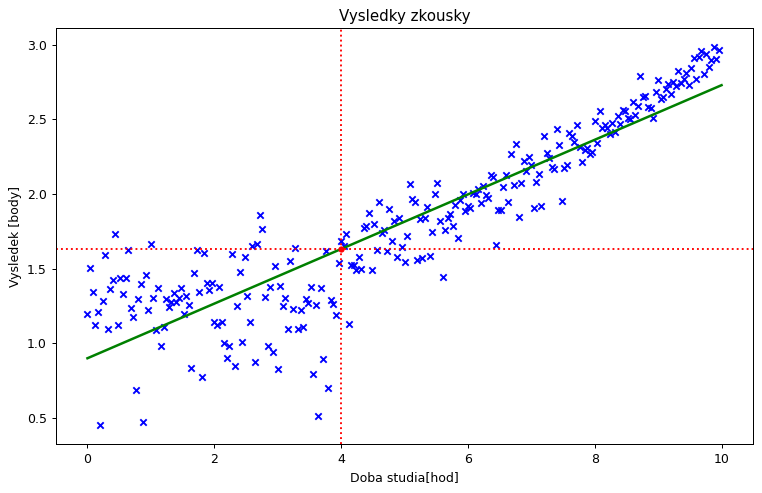

In [115]:
#################################################################
# ZDE DOPLNIT

valueX = 4
valueY = theta[0] + theta[1]*valueX
usu.draw(x_exp, np.log(y_exp), "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", theta, valueX, valueY)

#################################################################
